# EN 3160 Image Processing and Computer Vison

## Assignment 1 on Intensity Transformations and Neighborhood Filtering

In [77]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [78]:
img = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)

In [79]:
c=np.array([[0,0],[50,50],[50,100],[150,255],[150,150],[255,255]])

seg1=np.linspace(c[0,1],c[1,1], c[1,0]-c[0,0]+1).astype('uint8')
seg2=np.linspace(c[2,1]+1,c[3,1],c[3,0]-c[2,0]).astype('uint8')
seg3=np.linspace(c[4,1]+1,c[5,1],c[5,0]-c[4,0]).astype('uint8')

In [80]:
tranfrom=np.concatenate((seg1, seg2, seg3),axis=0).astype('uint8')
print(len(tranfrom  ))

256


In [81]:
img_transformed = cv.LUT(img, tranfrom)

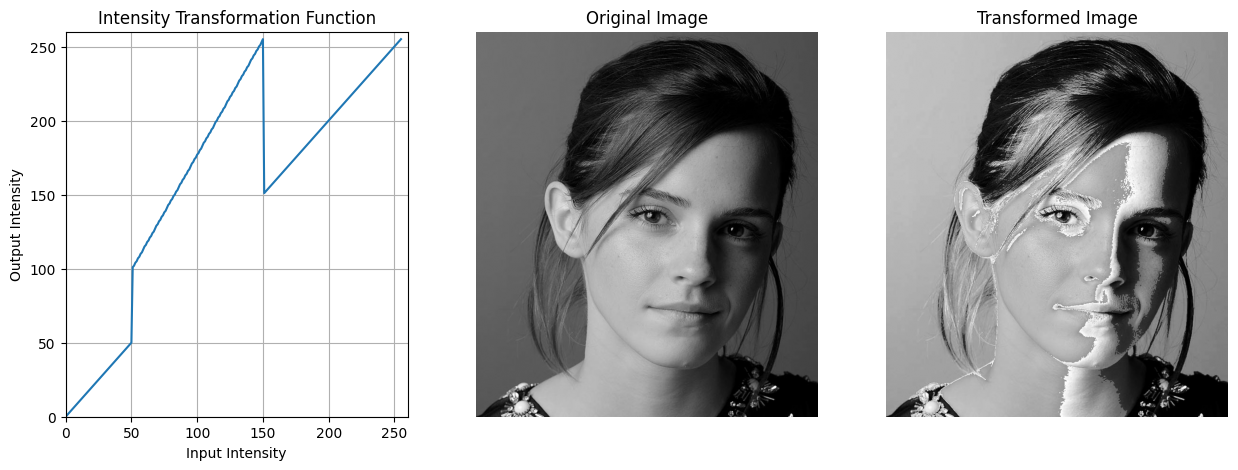

In [82]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot( tranfrom)
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 260)
plt.ylim(0, 260)
plt.subplot(1, 3, 2)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')
plt.show()



## Q(2)
Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.


### White Matter


In [83]:
img1 = cv.imread('brain.png',cv.IMREAD_GRAYSCALE)

In [84]:
white_thereshold = 190
seg1=np.linspace(0,0, white_thereshold+1).astype('uint8')
seg2=np.linspace(white_thereshold+1,255, 255-white_thereshold).astype('uint8')
#seg3=np.linspace(255,255, 255-201+1).astype('uint8')
tranfrom2=np.concatenate((seg1, seg2),axis=0).astype('uint8')
print(len(tranfrom2))

256


In [85]:
img_transformed2 = cv.LUT(img1, tranfrom2)

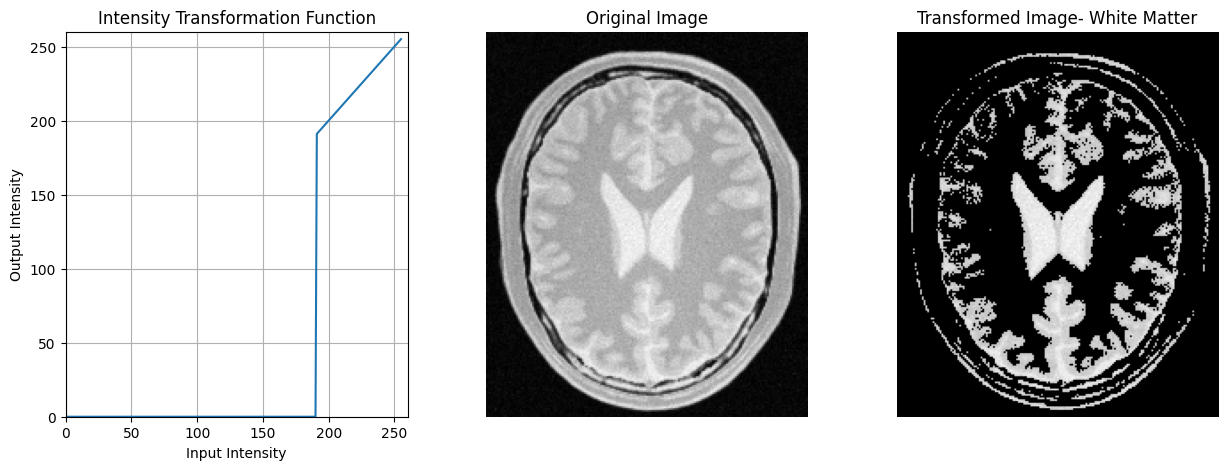

In [86]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot( tranfrom2)
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 260)
plt.ylim(0, 260)
plt.subplot(1, 3, 2)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_transformed2, cmap='gray')
plt.title('Transformed Image- White Matter')
plt.axis('off')
plt.show()

### Gray Matter

In [87]:
gray_thereshold1 = 125
gray_thereshold2 = 180

In [88]:
seg1=np.linspace(0,0, gray_thereshold1+1).astype('uint8')
seg2=np.linspace(gray_thereshold1+1,gray_thereshold2, gray_thereshold2-gray_thereshold1).astype('uint8')
seg3=np.linspace(0,0, 255-gray_thereshold2).astype('uint8')

tranfrom3=np.concatenate((seg1, seg2, seg3),axis=0).astype('uint8')
print(len(tranfrom3))

256


In [89]:
img_transformed3=cv.LUT(img1, tranfrom3)


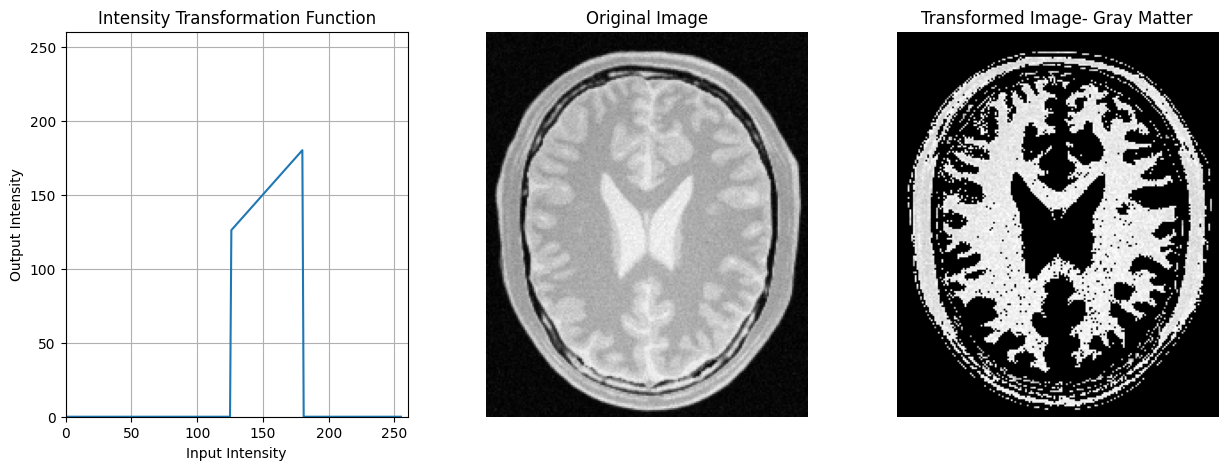

In [90]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot( tranfrom3)
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 260)
plt.ylim(0, 260)
plt.subplot(1, 3, 2)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_transformed3, cmap='gray')
plt.title('Transformed Image- Gray Matter')
plt.axis('off')
plt.show()

## Q(3)

 image split into l , a, b channels

In [91]:
img=cv.imread('q3.jpg',cv.IMREAD_COLOR)
img_lab= cv.cvtColor(img, cv.COLOR_BGR2Lab)
img_l,img_a,img_b=cv.split(img_lab)
print(img_l.shape, img_a.shape, img_b.shape)


(480, 720) (480, 720) (480, 720)


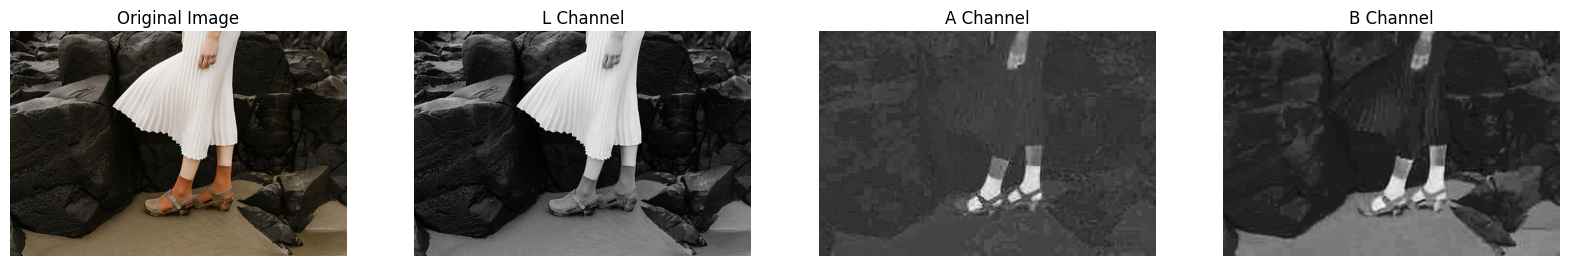

In [92]:

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(img_l, cmap='gray')
plt.title('L Channel')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(img_a, cmap='gray')
plt.title('A Channel')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(img_b, cmap='gray')
plt.title('B Channel')
plt.axis('off')
plt.show()


gamma correction for l channel

In [93]:
gamma=0.8
gamma_lut = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype('uint8')
imgl_gamma= cv.LUT(img_l,gamma_lut)
img_merge=cv.merge((imgl_gamma, img_a, img_b))
img_corrected=cv.cvtColor(img_merge, cv.COLOR_Lab2BGR)


In [94]:
img_rgb=cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_corrected_rgb=cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB)

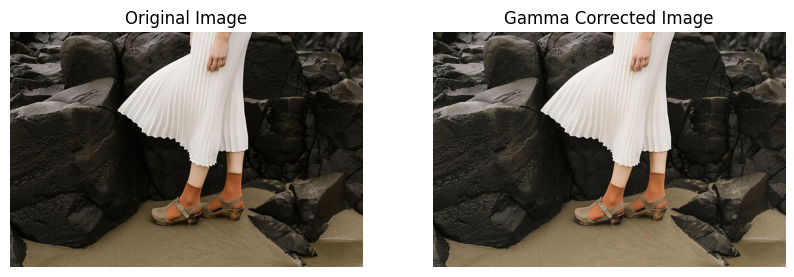

In [95]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_corrected_rgb)
plt.title('Gamma Corrected Image')
plt.axis('off')
plt.show()

In [96]:
rgb=['r', 'g', 'b']


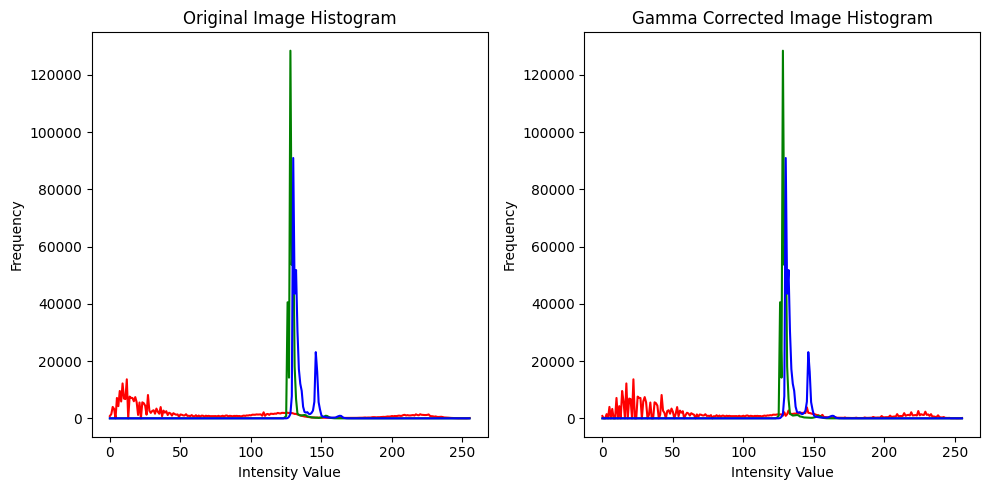

In [97]:
fig,ax=plt.subplots(1, 2, figsize=(10, 5))

for i in range(3):
    org_hist=cv.calcHist([img_lab],[i],None,[256],[0,256])
    ax[0].plot(org_hist, color=rgb[i])
    corr_hist=cv.calcHist([img_merge],[i],None,[256],[0,256])
    ax[1].plot(corr_hist, color=rgb[i])

ax[0].set_title('Original Image Histogram')
ax[0].set_xlabel('Intensity Value')
ax[0].set_ylabel('Frequency')

ax[1].set_title('Gamma Corrected Image Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Q(4)

Split the image shown in Fig. 4 into hue, saturation, and value planes.

In [98]:
img=cv.imread('spider.png',cv.IMREAD_COLOR)
img_rgb=cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv=cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)
hue, saturation, value = cv.split(img_hsv)


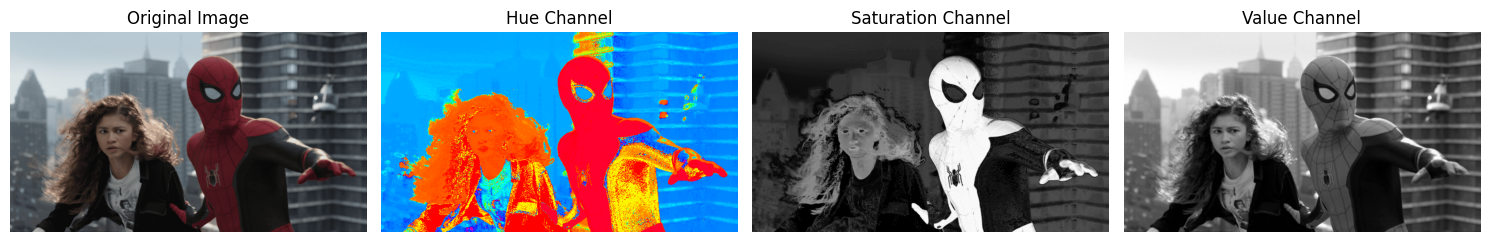

In [99]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(hue, cmap='hsv')
ax[1].set_title('Hue Channel')
ax[1].axis('off')
ax[2].imshow(saturation, cmap='gray')
ax[2].set_title('Saturation Channel')
ax[2].axis('off')
ax[3].imshow(value, cmap='gray')
ax[3].set_title('Value Channel')
ax[3].axis('off')
plt.tight_layout()
plt.show()

Apply the aforementioned intensity transformation to the saturation plane.

In [100]:
a=0.72 #it would be a value between 0 and 1
sigma=70

In [101]:
transform4=np.zeros((256)).astype('uint8')  # Initialize the transformation array
for i in range(256):
    gval=(i+a*128*np.exp(-((i-128)**2)/(2*sigma**2))) # Ensure gval is an integer
    transform4[i]=int(min(gval,255))


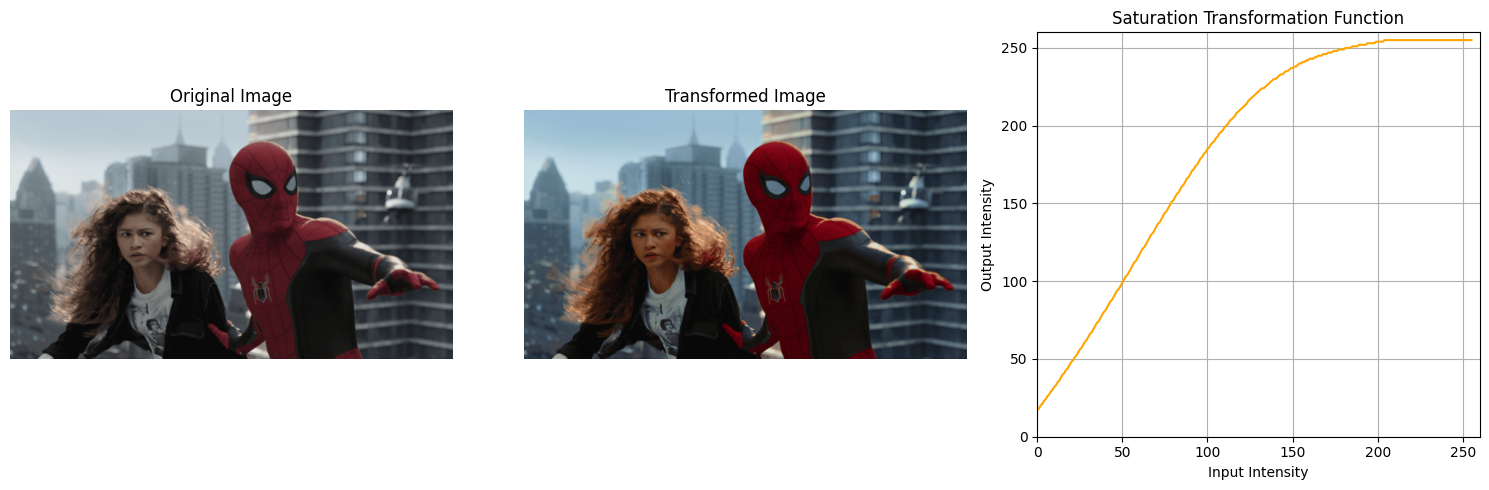

In [102]:
sat_transformed = cv.LUT(saturation, transform4)
img_transformed = cv.merge((hue, sat_transformed, value))
img_transformed_rgb = cv.cvtColor(img_transformed, cv.COLOR_HSV2RGB)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_transformed_rgb)
plt.title('Transformed Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.plot(transform4, color='orange')
plt.title('Saturation Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 260)
plt.ylim(0, 260)
plt.tight_layout()
plt.subplot(1, 3, 2)
plt.axis('off')
plt.show()

## Q(5)

In [149]:
img=cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)

In [150]:
histo,bins = np.histogram(img.ravel(), bins=256, range=[0, 256])
cdf=histo.cumsum()
cdf_normalized = cdf * histo.max() / cdf.max()


In [151]:
def equalize_histogram(img):
    histo, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
    cdf = histo.cumsum()
    cdf_normalized = cdf * histo.max() / cdf.max()
    table = np.interp(img.flatten(), bins[:-1], cdf_normalized)
    return table.reshape(img.shape).astype('uint8')

In [152]:
equalize_histogram = equalize_histogram(img)
histo_eq, bins_eq = np.histogram(equalize_histogram.ravel(), bins=256, range=[0, 256])
cdf_eq = histo_eq.cumsum()
cdf_eq_normalized = cdf_eq * histo_eq.max() / cdf_eq.max()

C:\Users\nimne\AppData\Local\Temp\ipykernel_25812\3689917.py:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.flatten(), 256,[0,256], color='red')
C:\Users\nimne\AppData\Local\Temp\ipykernel_25812\3689917.py:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(equalize_histogram.flatten(), 256,[0,256], color='red')


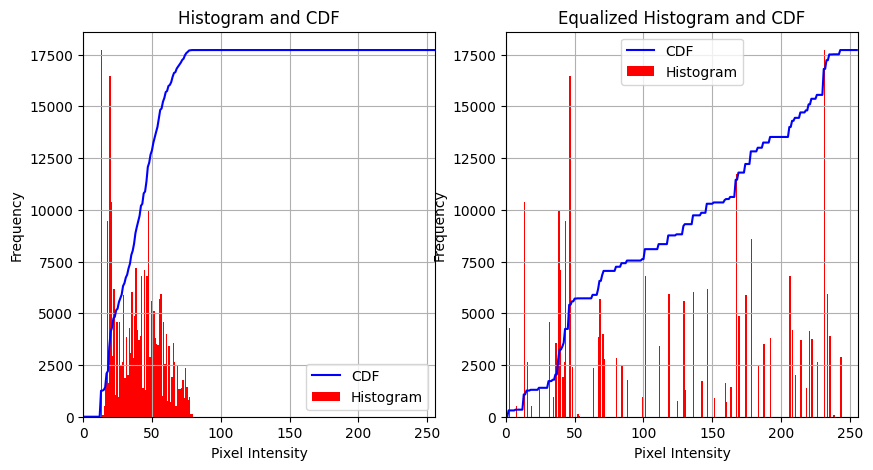

In [107]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cdf_normalized, color='blue')
plt.hist(img.flatten(), 256,[0,256], color='red')
plt.title('Histogram and CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.xlim(0, 256)
plt.legend(['CDF', 'Histogram'])
plt.subplot(1, 2, 2)
plt.plot(cdf_eq_normalized, color='blue')
plt.hist(equalize_histogram.flatten(), 256,[0,256], color='red')
plt.title('Equalized Histogram and CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.xlim(0, 256)
plt.legend(['CDF', 'Histogram'])

plt.show()

## Q(6)

In [160]:
img=cv.imread('jeniffer.jpg',cv.IMREAD_COLOR)
img_rgb=cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv=cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)
hue,saturation,value=cv.split(img_hsv)


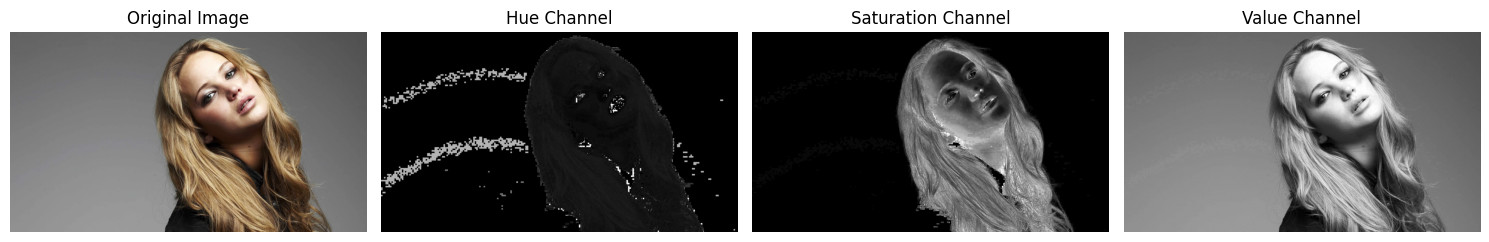

In [161]:
fig,ax=plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(hue, cmap='gray')
ax[1].set_title('Hue Channel')
ax[1].axis('off')
ax[2].imshow(saturation, cmap='gray')
ax[2].set_title('Saturation Channel')
ax[2].axis('off')
ax[3].imshow(value, cmap='gray')
ax[3].set_title('Value Channel')
ax[3].axis('off')
plt.tight_layout()
plt.show()

In [162]:
threshold=165

In [163]:
a,foreground_hue=cv.threshold(hue,threshold,255,cv.THRESH_BINARY)
b,foreground_sat=cv.threshold(saturation,threshold,255,cv.THRESH_BINARY)
c,foreground_val=cv.threshold(value,threshold,255,cv.THRESH_BINARY)

In [164]:
foreground_img=cv.bitwise_and(img, img, mask=foreground_val)

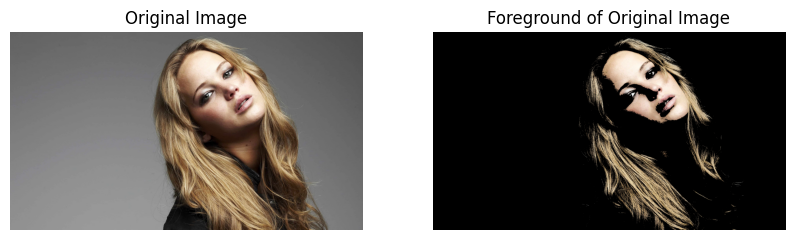

In [165]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
plt.title('Foreground of Original Image')
plt.axis('off')
plt.show()

In [166]:
b_hist= cv.calcHist([foreground_img], [0], None, [256], [0, 256])
g_hist= cv.calcHist([foreground_img], [1], None, [256], [0, 256])
r_hist= cv.calcHist([foreground_img], [2], None, [256], [0, 256])



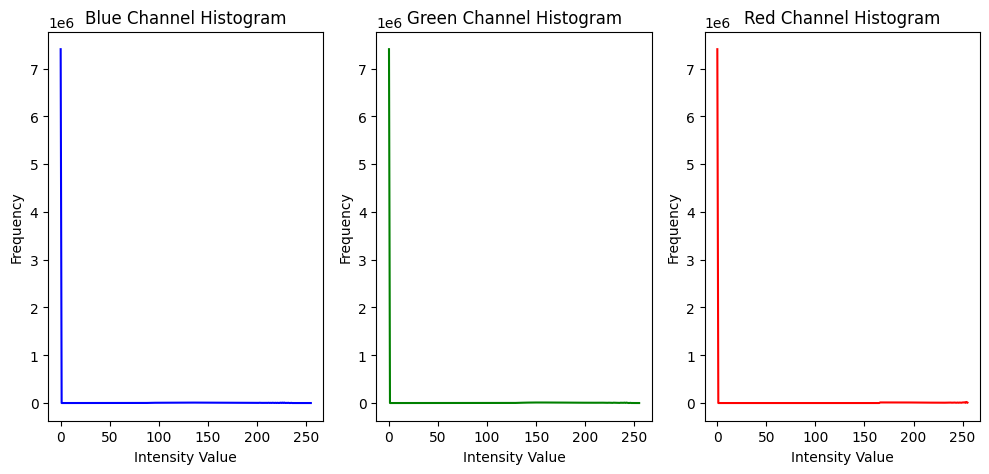

In [167]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3,1)
plt.plot(b_hist, color='b')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.subplot(1, 3,2)
plt.plot(g_hist, color='g')
plt.title('Green Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.subplot(1, 3,3)
plt.plot(r_hist, color='r')
plt.title('Red Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [168]:
bhist_cum= np.cumsum(b_hist)
ghist_cum= np.cumsum(g_hist)
rhist_cum= np.cumsum(r_hist)



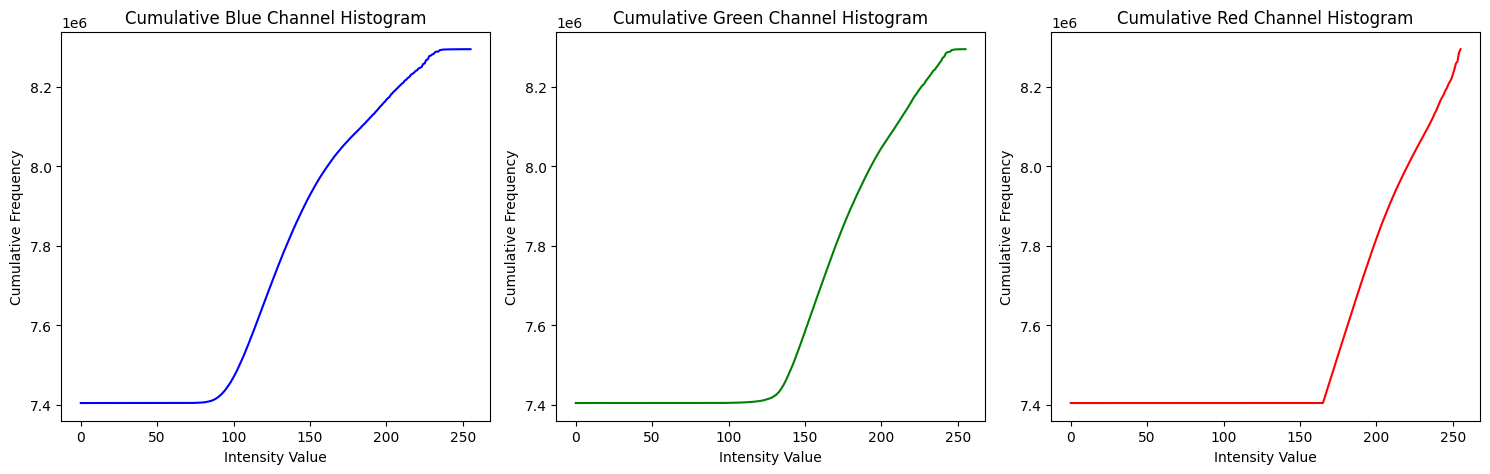

In [169]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(bhist_cum, color='b')
plt.title('Cumulative Blue Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Cumulative Frequency')
plt.subplot(1, 3, 2)
plt.plot(ghist_cum, color='g')
plt.title('Cumulative Green Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Cumulative Frequency')
plt.subplot(1, 3, 3)
plt.plot(rhist_cum, color='r')
plt.title('Cumulative Red Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Cumulative Frequency')
plt.tight_layout()
plt.show()

In [118]:
r_equalized=cv.equalizeHist(foreground_img[:,:,0])
g_equalized=cv.equalizeHist(foreground_img[:,:,1])
b_equalized=cv.equalizeHist(foreground_img[:,:,2])

equilized_img=cv.merge((r_equalized, g_equalized, b_equalized))

In [119]:
req_hist=cv.calcHist([equilized_img], [0], None, [256], [0, 256])
geq_hist=cv.calcHist([equilized_img], [1], None, [256], [0, 256])
beq_hist=cv.calcHist([equilized_img], [2], None, [256], [0, 256])

In [120]:
req_hist_cum= np.cumsum(req_hist)
geq_hist_cum= np.cumsum(geq_hist)
beq_hist_cum= np.cumsum(beq_hist)

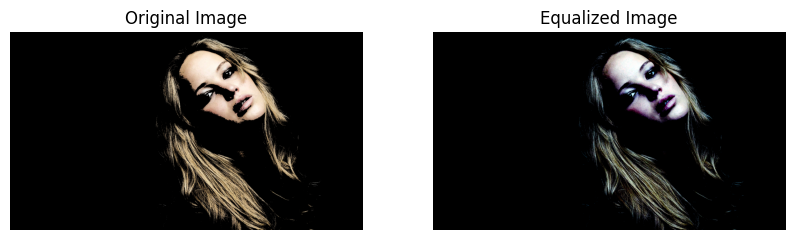

In [121]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equilized_img, cv.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')
plt.show()

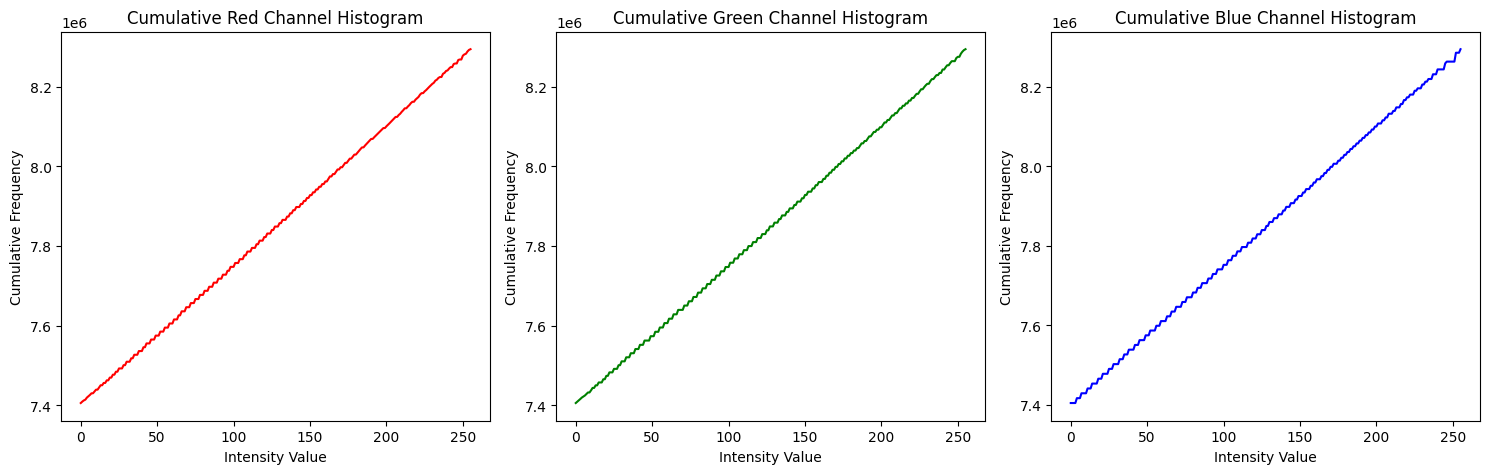

In [122]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(req_hist_cum, color='r')
plt.title('Cumulative Red Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Cumulative Frequency')
plt.subplot(1, 3, 2)
plt.plot(geq_hist_cum, color='g')
plt.title('Cumulative Green Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Cumulative Frequency')
plt.subplot(1, 3, 3)
plt.plot(beq_hist_cum, color='b')
plt.title('Cumulative Blue Channel Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Cumulative Frequency')
plt.tight_layout()
plt.show()



In [123]:
background_img=cv.bitwise_and(img, img, mask=cv.bitwise_not(foreground_val))

img_final = cv.add( background_img, equilized_img)
img_final_rgb = cv.cvtColor(img_final, cv.COLOR_BGR2RGB)


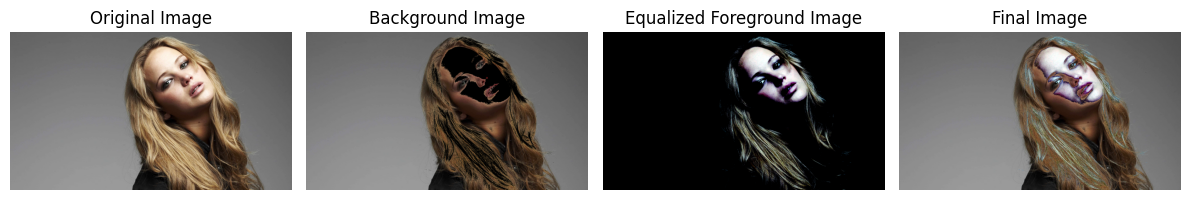

In [124]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
plt.title('Background Image')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(cv.cvtColor(equilized_img, cv.COLOR_BGR2RGB))
plt.title('Equalized Foreground Image')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(img_final_rgb)
plt.title('Final Image')
plt.axis('off')
plt.tight_layout()
plt.show()


## Q(7)

In [125]:
img=cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)


In [126]:
x_kernal=np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) 
y_kernal=np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  

In [127]:
filter_img_x=cv.filter2D(img, -1, x_kernal)
filter_img_y=cv.filter2D(img, -1, y_kernal)

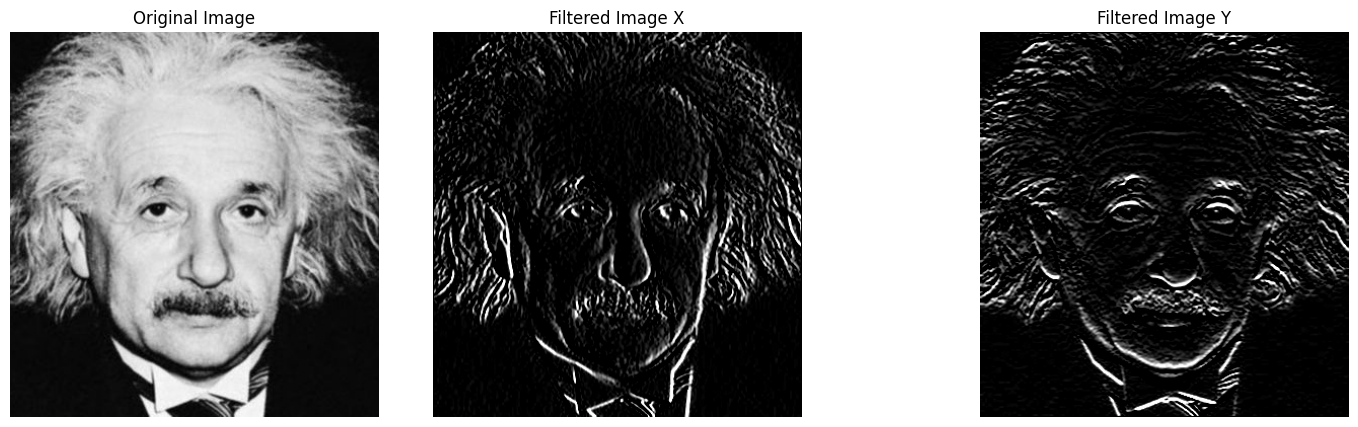

In [128]:

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(filter_img_x, cmap='gray')
plt.title('Filtered Image X')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(filter_img_y, cmap='gray')
plt.title('Filtered Image Y')
plt.axis('off')
plt.show()


In [129]:
def sobel_filter(image,kernal):
    inimg_height, inimg_width = image.shape
    kernal_height, kernal_width = kernal.shape
    outimg_height, outimg_width = inimg_height - kernal_height + 1, inimg_width - kernal_width + 1
    outimg = np.zeros((outimg_height, outimg_width), dtype='float32')
    for i in range(outimg_height):
        for j in range(outimg_width):
            region = image[i:i + kernal_height, j:j + kernal_width]
            outimg[i, j] = np.sum(region * kernal)

            if outimg[i, j] < 0:
                outimg[i, j] = 0
            elif outimg[i, j] > 255:
                outimg[i, j] = 255
    
    return outimg.astype('uint8')



In [130]:
x_kernal=np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) 
y_kernal=np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  

In [131]:
x_sobel=sobel_filter(img, x_kernal)
y_sobel=sobel_filter(img, y_kernal)
sobel_magnitude = np.sqrt(x_sobel**2 + y_sobel**2)




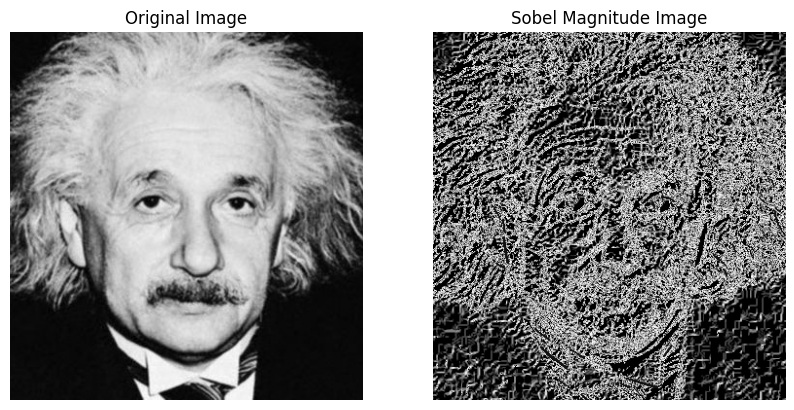

In [132]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude Image')
plt.axis('off')
plt.show()

In [133]:
conv1 = cv.filter2D(img, -1, x_kernal)
conv2 = cv.filter2D(img, -1, y_kernal)


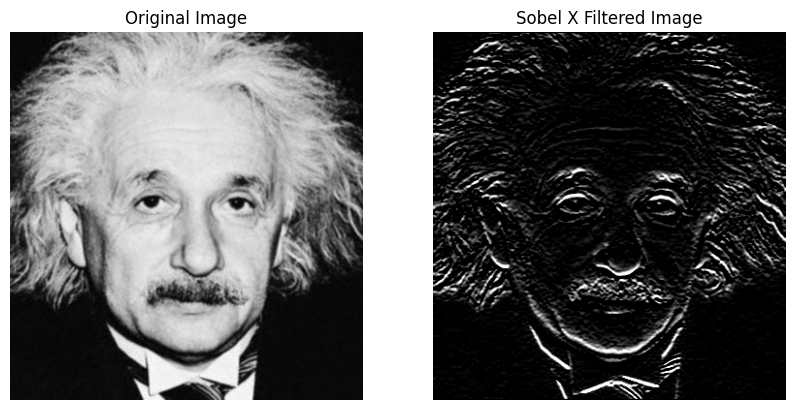

In [134]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2, 2)
plt.imshow(conv2, cmap='gray')
plt.title('Sobel X Filtered Image')
plt.axis('off')
plt.show()


## Q(8)

In [135]:
img=cv.imread('im03small.png', cv.IMREAD_COLOR)
img_rgb=cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [136]:
def zoom_image(image,zoom_factor):
    height,width, channels = image.shape
    new_height = int(height * zoom_factor)-1
    new_width = int(width * zoom_factor)
    output_image=np.zeros((new_height, new_width, channels), dtype=np.uint8)
    for i in range(new_height):
        for j in range(new_width):
            orig_i = int(i / zoom_factor)
            orig_j = int(j / zoom_factor)
            output_image[i, j] = image[orig_i, orig_j]
    print(f"Original Image Shape: {image.shape}")
    print(f"Zoom Factor: {zoom_factor}")
    print(f"Zoomed Image Shape: {output_image.shape}")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
    plt.title('Zoomed Image')
    plt.axis('off')
    plt.show()
    
    return output_image


Original Image Shape: (365, 600, 3)
Zoom Factor: 4.0
Zoomed Image Shape: (1459, 2400, 3)


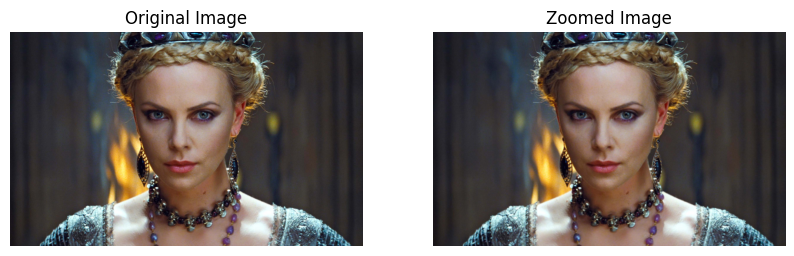

In [137]:
zoomed_image = zoom_image(img, 4.0)  # Zoom factor of 2.0


In [138]:
img_BIG=cv.imread('im03.png', cv.IMREAD_COLOR)
ssd=np.sum((img_BIG - zoomed_image) ** 2)
n_ssd=ssd/(np.sum(img_BIG)**2 + np.sum(zoomed_image)**2)
print(f"Normalized SSD: {n_ssd} ")

Normalized SSD: 1.3558483002892472e-10 


In [139]:
img=cv.imread('im03small.png', cv.IMREAD_COLOR)
img_rgb=cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [140]:
def zoom_image(image, zoom_factor):
    height, width, channels = image.shape
    new_height = int(height * zoom_factor)-1
    new_width = int(width * zoom_factor)
    output_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    yscale = height / new_height
    xscale = width / new_width
    #print(f"Original Image Shape: {image.shape}")
    

    for i in range(new_height):
        for j in range(new_width):
            orig_y = i*yscale
            orig_x = j*xscale
            x1,y1 = int(orig_x), int(orig_y)
            x2, y2 = min(x1 + 1, width - 1), min(y1 + 1,height - 1)

            weight_x = orig_x - x1
            weight_y = orig_y - y1
            
            pixel_interpolated = ((1 - weight_x) * (1 - weight_y) * image[y1, x1] +  weight_x * (1 - weight_y) * image[y1, x2] + 
                                  (1 - weight_x) * weight_y * image[y2, x1] +  weight_x * weight_y * image[y2, x2])
            output_image[i, j] = pixel_interpolated


    print(f"Original Image Shape: {image.shape}")
    print(f"Zoom Factor: {zoom_factor}")
    print(f"Zoomed Image Shape: {output_image.shape}")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
    plt.title('Zoomed Image')
    plt.axis('off')
    plt.show()

    return output_image


                        

Original Image Shape: (365, 600, 3)
Zoom Factor: 4.0
Zoomed Image Shape: (1459, 2400, 3)


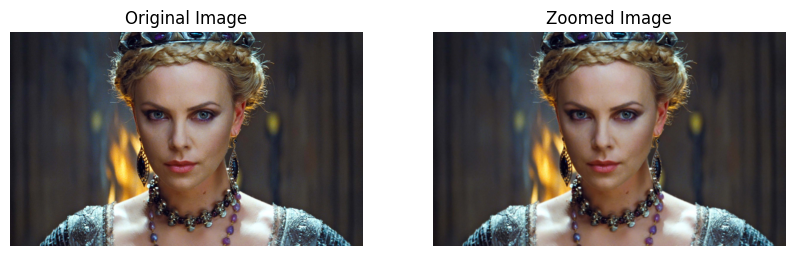

In [141]:
zoomed_image = zoom_image(img, 4.0)  


In [142]:
img_BIG=cv.imread('im03.png', cv.IMREAD_COLOR)
ssd=np.sum((img_BIG - zoomed_image) ** 2)
n_ssd=ssd/(np.sum(img_BIG)**2 + np.sum(zoomed_image)**2)
print(f"Normalized SSD: {n_ssd} ")

Normalized SSD: 1.8872849581793565e-10 


## Q(9)

In [170]:
img=cv.imread('daisy.jpg', cv.IMREAD_COLOR)
img_rgb=cv.cvtColor(img, cv.COLOR_BGR2RGB)


In [171]:
mask=np.zeros(img.shape[:2], dtype=np.uint8)
forground=np.zeros((1,65), dtype=np.float64)
background=np.zeros((1,65), dtype=np.float64)
rect=(50,50,img.shape[1]-50, img.shape[0]-50)

In [172]:
cv.grabCut(img, mask, rect, forground, background, 5, cv.GC_INIT_WITH_RECT)
new_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground_img = img * new_mask[:, :, np.newaxis]
background_img = img * (1 - new_mask[:, :, np.newaxis])
background_blurred = cv.GaussianBlur(background_img, (23,23), 0)
enhanced_image = cv.add(foreground_img, background_blurred)

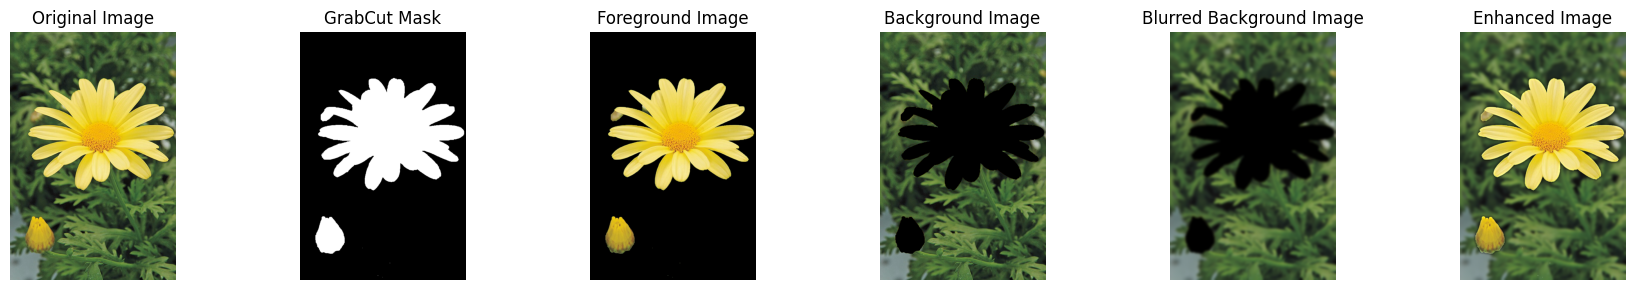

In [148]:
plt.figure(figsize=(18, 3))
plt.subplot(1, 6, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 6, 2)
plt.imshow(new_mask, cmap='gray')
plt.title('GrabCut Mask')
plt.axis('off')
plt.subplot(1, 6, 3)
plt.imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
plt.title('Foreground Image')
plt.axis('off')
plt.subplot(1, 6, 4)
plt.imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
plt.title('Background Image')
plt.axis('off')
plt.subplot(1, 6, 5)
plt.imshow(cv.cvtColor(background_blurred, cv.COLOR_BGR2RGB))
plt.title('Blurred Background Image')
plt.axis('off')
plt.subplot(1, 6, 6)
plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')
plt.tight_layout()
plt.show()



